In [3]:

from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
from numpy import array, inf, linspace, pi
import numpy as np
from scipy.interpolate import interp1d
from tmm.tmm_core import (coh_tmm, ellips, find_in_structure_with_inf, inc_tmm,
                          position_resolved, unpolarized_RT)

try:
    import colorpy.illuminants
    import colorpy.colormodels
    from . import color
    colors_were_imported = True
except ImportError:
    # without colorpy, you can't run sample5(), but everything else is fine.
    colors_were_imported = False

    

In [35]:
degree = pi/180


wavelength_min_nm = 100
wavelength_max_nm = 1200
wavelength = np.linspace(wavelength_min_nm, wavelength_max_nm, num=400)

# make a list of refractive index with wavelength dependence
air_n = np.array([])
for i in range(len(wavelength)):
    air_n = np.append(air_n,[1])
    
water_n = np.array([])
for i in range(len(wavelength)):
    water_n = np.append(water_n,[1.33])

#define cellulose' refractive index
cellulose_n = np.array([])
for i in range(len(wavelength)):
    #n = np.sqrt(1+1.124*wavelength[i]**2/(wavelength[i]**2-0.011087)) 
    n = 1.5  + 0.3j
    cellulose_n = np.append(cellulose_n, n)
    
air_n = np.stack((wavelength, air_n))
water_n = np.stack((wavelength, water_n))
cellulose_n = np.stack((wavelength, cellulose_n))


# number of repeats
number_of_repeats = 100
cellulose_d = 125 / 1.55
air_d = 125/1
# list of layer thicknesses in nm
d_list = []
c_list = []
# air on top
d_list.append(inf)
c_list.append('i') # for incoherent
n_list = air_n[1]
for i in range(0,number_of_repeats):
    d_list.append(cellulose_d)
    c_list.append('c') # for coherent
    d_list.append(air_d)
    c_list.append('c') # for coherent
    n_list = np.vstack((n_list, cellulose_n[1]))
    n_list = np.vstack((n_list, air_n[1]))
        
# air at the bottom
d_list.append(inf)
c_list.append('i') # for incoherent
n_list = np.vstack((n_list, air_n[1]))
# list of refractive indices
#n_list = [1, 2.2, 3.3+0.3j, 1]



In [36]:

Rnorm = [] # reflection at normal direction
R45 = [] # reflection at 45 direction

# Angles related to the NA of the objective used
angles=linspace(0,0,1)

RNA = np.zeros((len(wavelength),len(angles)))
    
for i in range(len(wavelength)):
# For normal incidence, s and p polarizations are identical.
# I arbitrarily decided to use 's'.

#RNA = np.zeros(wavelength.size, angles.size)

    for j in range(len(angles)):
        RNA[i,j] += inc_tmm('s', n_list[:,i], d_list, c_list, angles[j]*degree, wavelength[i])['R']
        RNA[i,j] += inc_tmm('p', n_list[:,i], d_list, c_list, angles[j]*degree, wavelength[i])['R']
    
RNA = RNA/2
RNAmean = np.mean(RNA, axis=1)

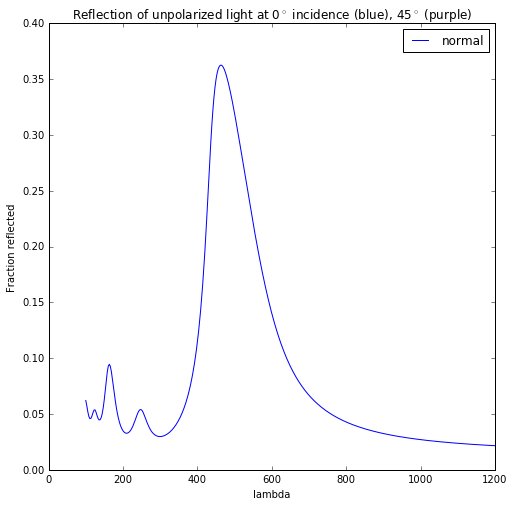

In [37]:

fig = plt.figure(figsize=(8,8))
plt.plot(wavelength, RNAmean, 'blue', label= 'normal')
#plt.plot(wavelength, R45, 'purple', label= '45')

#plt.xlabel('k (cm$^{-1}$)')
plt.xlabel('lambda')
plt.ylabel('Fraction reflected')
plt.legend()
plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
          '45$^\circ$ (purple)')

plt.show()

#py.iplot_mpl(fig)


In [12]:
plot_offline = True
import plotly

if plot_offline is False:
    # Start Plotting Online
    plotly.tools.set_credentials_file(username='herbzhaocam', api_key='Wvld9LkdNvnOPdifcjhE')
    plotly.tools.set_config_file(world_readable=False, sharing='private')
    import plotly.plotly as py

if plot_offline is True:
    plotly.offline.init_notebook_mode(connected=True) #required to run plotly in jupyter offline
    import plotly.offline as py
    
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import plotly.graph_objs as go




In [6]:
wavelength = np.linspace(wavelength_min_nm, wavelength_max_nm, num=400)

In [7]:
len(wavelength)

400

In [92]:
a = np.array([1,2,3,4,5])
b = np.array([1,2,3,4,5])
c= np.array([1,2,3,4,5])

d = np.vstack((a,b,c ))
d

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [164]:
i = []
i.append([])